## Explore and Format

In this step we are going to explore the data, to see how the time series behave

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

In [3]:
df = pd.read_csv('data/train_sample.csv',parse_dates=['date'], date_parser=dateparse,low_memory=False).iloc[:,1:]

In [4]:
df.sample(3)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
1336981,74727590,2016-03-29,25,819206,3.263,False
1933068,117524357,2017-06-01,25,838215,4.000,False
354603,18741925,2014-02-10,25,1148971,3.000,NaN


In [5]:
df = df.sort_values(['item_nbr','date'])

In [6]:
df.head(5)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
26761,1362063,2013-02-04,25,96995,1.0,NaN
75821,3670262,2013-03-31,25,96995,1.0,NaN
79322,3843971,2013-04-04,25,96995,2.0,NaN
81128,3930364,2013-04-06,25,96995,1.0,NaN
85440,4144340,2013-04-11,25,96995,2.0,NaN


In [7]:
# we have 3513 items
df.item_nbr.unique().shape

(3513,)

# Complete null sales with 0

As we can see, not every day has sales reported. According to Kaggle's documentation, if an item is not informed for a date, that means it had zero sales. Lets complete the dataset to reflect this fact.

In [8]:
len(df)

2057020

In [30]:
dfCompletedList = []

In [31]:
def completeItem(dfItem):    
    min_date = dfItem['date'].min()
    max_date = dfItem['date'].max()
    if min_date == max_date:
        #only one data point
        return
    r = pd.date_range(start=min_date, end=max_date)
    dfItemNew = dfItem.set_index('date').reindex(r).fillna(0.0).rename_axis('date').reset_index()
    dfItemNew['item_nbr'] = dfItem['item_nbr'].max()
    dfCompletedList.append(dfItemNew)

In [ ]:
for index,group in df.groupby('item_nbr'):
    completeItem(group)

In [33]:
len(dfCompletedList)

3502

In [34]:
dfCompleted = pd.concat(dfCompletedList)

In [35]:
dfCompleted.head()

,date,id,store_nbr,item_nbr,unit_sales,onpromotion
0,2013-02-04,1362063.0,25.0,96995,1.0,0
1,2013-02-05,0.0,0.0,96995,0.0,0
2,2013-02-06,0.0,0.0,96995,0.0,0
3,2013-02-07,0.0,0.0,96995,0.0,0
4,2013-02-08,0.0,0.0,96995,0.0,0


# Time series plots

Next, we are going to take four random series and see how they behave. We can see that different products have completely different number of sales. Some of them have sales almost every they, but some of them are only sold a few times a month.


In [36]:
random_items = list(np.random.choice(df.item_nbr.unique(),4))
random_items

[1933240, 979197, 1390405, 1932493]

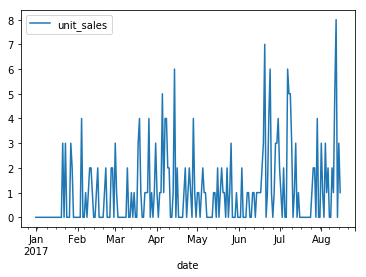

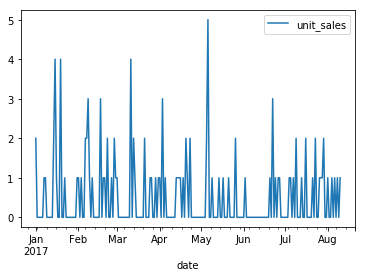

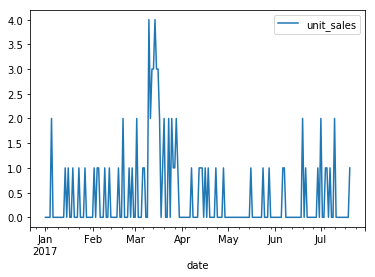

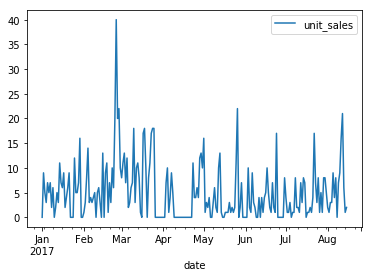

In [37]:
for i in range(4):
    dfCompleted[(dfCompleted['item_nbr']==random_items[i]) & (dfCompleted['date'].dt.year==2017)].plot(x='date', y='unit_sales');



## Create Target Time Series

Now we are going to create the input Data Set for Amazon Forecast following the guidelines of the Retail Domain in Amazon Forecast. Check <a href='https://docs.aws.amazon.com/forecast/latest/dg/retail-domain.html' > the docs </a>


    item_id (string) – A unique identifier for the item or product that you want to predict the demand for.

    timestamp (timestamp)

    demand (float) – The number of sales for that item at the timestamp. This is also the target field for which Amazon Forecast generates a forecast.



In [38]:
dfCompleted[['item_nbr','date','unit_sales']].to_csv('target_time_series.csv',index=False,header=False)

## Next steps

In the <a href='3.PredictWithAmazonForecast.ipynb' >next notebook </a> we are going to split the dataset between train and test, upload the data to S3, create the Dataset and Dataset Group in Amazon Forecast and finally train a model choosing one of the available recipes.